In [26]:
import pandas as pd
import statistics
import operator

df = pd.read_csv('new_data.csv')
del df[df.columns[0]]
neighs = set(df['Neighborhood'])
neighs = list(neighs)
neigh_data = {}
for neigh in neighs:
    tmp_df = df[df['Neighborhood'] == neigh]
    tmp_neigh = neigh.replace(" ", "_")
    tmp_df.to_csv(f'./Neighborhood_Split/{tmp_neigh}.csv')
    tmp_price = list(tmp_df['price'])
    neigh_mean = round(statistics.mean(tmp_price),2)
    neigh_data[neigh] = neigh_mean

top = dict(sorted(neigh_data.items(), key=operator.itemgetter(1), reverse=True)[:3])
bottom = dict(sorted(neigh_data.items(), key=operator.itemgetter(1), reverse=True)[-3:])
length = int(len(neigh_data.items())/2)
middle = dict(sorted(neigh_data.items(), key=operator.itemgetter(1), reverse=True)[length - 1:length + 2])

print(f'Top: {top.keys()}')
print(f'Mid:{middle.keys()}')
print(f'Bottom: {bottom.keys()}')

top.update(bottom)
top.update(middle)

Top: dict_keys(['Cherry Creek', 'Washington Park', 'Auraria'])
Mid:dict_keys(['Washington Virginia Vale', 'City Park West', 'Regis'])
Bottom: dict_keys(['Barnum West', 'Goldsmith', 'Westwood'])


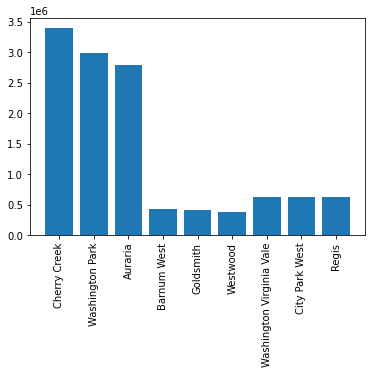

In [14]:
import matplotlib.pyplot as plt

neigh = list(top.keys())
means = list(top.values())

plt.bar(range(len(top)), means, tick_label=neigh)
plt.xticks(rotation = 90)
plt.show()

In [19]:
std_dev = df['price'].std()
mean_val = df['price'].mean()
min_val = df['price'].min()
max_val = df['price'].max()

print("STD: ", std_dev)
print("Mean: ", mean_val)
print("Min: ", min_val)
print("Max: ", max_val)


STD:  1182463.199896799
Mean:  1000607.2965986395
Min:  77500.0
Max:  15000000.0


In [21]:
print(df['price'].describe())

count    7.350000e+03
mean     1.000607e+06
std      1.182463e+06
min      7.750000e+04
25%      4.699000e+05
50%      6.250000e+05
75%      9.750000e+05
max      1.500000e+07
Name: price, dtype: float64


In [30]:
years = set(df['Year'])
years = list(years)

for year in years:
    tmp_df = df[df["Year"] == year]
    year = str(year)
    tmp_df.to_csv(f'./Year_Split/{year[:4]}.csv')


In [31]:
std_dev = std_dev * 2
min_std_dev = round(mean_val - std_dev,2)
max_std_dev = round(mean_val + std_dev,2)
print(min_std_dev)
print(max_std_dev)

-1364319.1
3365533.7
